In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve 
from yellowbrick.classifier import ROCAUC


#prepr auto sklearn
from collections import Counter
import io
import warnings
warnings.filterwarnings('ignore')

# set directory
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir('/content/drive/MyDrive/BAX453/Individual Assignment')

## Import data

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9
0,3,102,74,0,0,29.5,0.121,32,0,0.002660
1,1,125,70,24,110,24.3,0.221,25,0,0.004575
2,4,156,75,0,0,48.3,0.238,32,1,0.007303
3,5,117,86,30,105,39.1,0.251,42,0,0.007865
4,2,122,60,18,106,29.8,0.717,22,0,0.010887


Data Type: Diabetes
2. Dataset size: 768
3. Number of features: 7
4. Features: <br>
  4.1. Pregnancies: Number of pregnancies <br>
  4.2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
  4.3. BloodPressure: Diastolic blood pressure (mm Hg)<br>
  4.4. SkinThickness: Triceps skin fold thickness (mm)<br>
  4.5. Insulin: 2-Hour serum insulin (mu U/ml)<br>
  4.6. BMI: Body mass index (weight in kg/(height in m)^2)<br>
  4.7. DiabetesPedigreeFunction: Diabetes pedigree function<br>
  4.8. Age: Age (years)<br>
  4.9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               359 non-null    int64  
 1   Glucose                   359 non-null    int64  
 2   BloodPressure             359 non-null    int64  
 3   SkinThickness             359 non-null    int64  
 4   Insulin                   359 non-null    int64  
 5   BMI                       359 non-null    float64
 6   DiabetesPedigreeFunction  359 non-null    float64
 7   Age                       359 non-null    int64  
 8   Outcome                   359 non-null    int64  
 9   Unnamed: 9                359 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 28.2 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,3.802228,122.431755,67.919220,19.961003,81.253482,32.504457,0.471148,33.662953,0.370474,0.236875
std,3.462068,31.850825,20.922353,16.353929,113.588372,7.687044,0.336621,11.732138,0.483606,0.132586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000,0.002660
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.600000,0.244500,24.000000,0.000000,0.125888
50%,3.000000,119.000000,72.000000,23.000000,0.000000,32.400000,0.365000,30.000000,0.000000,0.229535
75%,6.000000,144.000000,80.000000,32.000000,135.000000,37.400000,0.630000,41.000000,1.000000,0.348000
max,17.000000,198.000000,114.000000,99.000000,744.000000,67.100000,2.329000,72.000000,1.000000,0.472357


## EDA

In [11]:
df.Outcome.value_counts()

0    226
1    133
Name: Outcome, dtype: int64

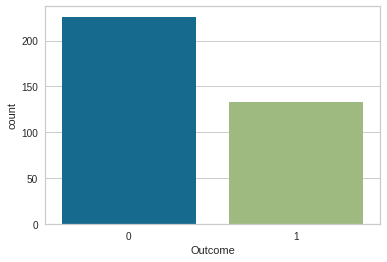

In [12]:
sns.countplot(x="Outcome", data=df)
plt.show()

/bin/bash: 1,3: command not found


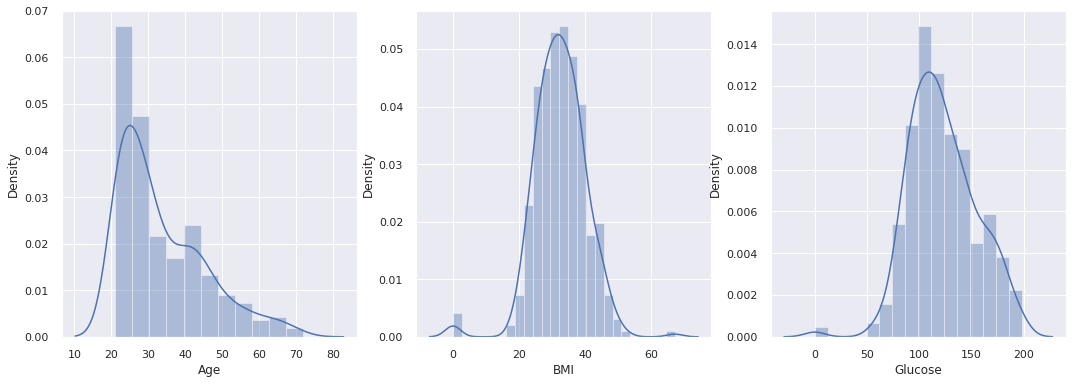

In [15]:
# distribution plot of Age, BMI, and Glucose
plt.figure(figsize=(18,6))
#(1,1)
plt.subplot(1,3,1)
sns.distplot(df['Age'])
#(1,2)
plt.subplot(1,3,2)
sns.distplot(df['BMI'])
!(1,3)
plt.subplot(1,3,3)
sns.distplot(df['Glucose'])

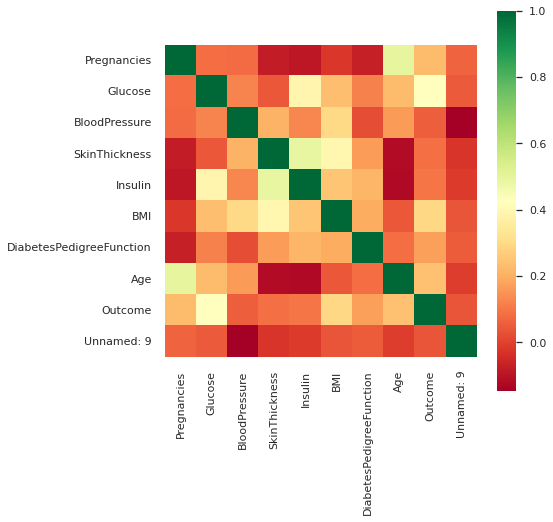

In [16]:
# heatmap to check the correlation between outcome and other variables
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(df.iloc[:,:].corr(), square=True, cmap='RdYlGn')

In [ ]:
# slope, fbs, chol are not so correlated with target, so exclude them from the modeling 
df_filtered = df.drop(['Outcome'], axis=1)
df_filtered.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Model


In [ ]:
X = df_filtered
y = df.Outcome

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


### Logistic Regression

In [ ]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

#### Grid Search for Logistic Regression

In [ ]:
#Create Hyperparameter Search Space
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
#Create Grid Search
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [ ]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
#Conduct Grid Search
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [ ]:
#View Hyperparameter Values Of Best Model
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [ ]:
#Predict Using Best Model
# Predict target vector
y_pred_log = best_model.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

#### Accessment and interpretation of the best model selected

In [ ]:

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print('-----')
print(classification_report(y_test, y_pred_log))

[[172  34]
 [ 36  66]]
-----
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.66      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



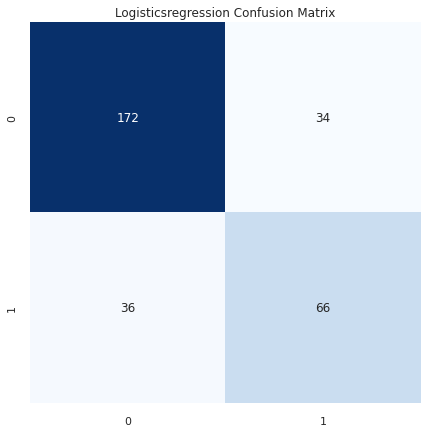

In [ ]:
plt.title("Logisticsregression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_log),annot=True,cmap="Blues",fmt="d",cbar=False)

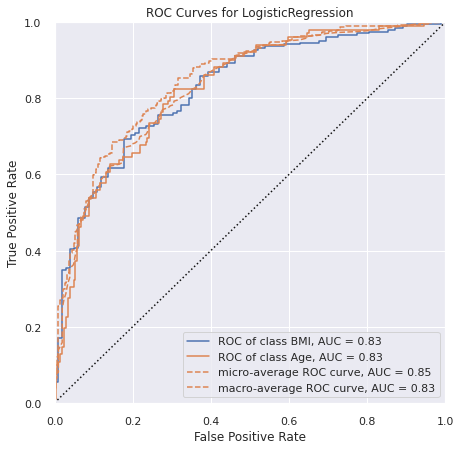

In [ ]:
classes = ["BMI", "Age"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

precision = True Positive / (True Positive + False Positive)
recall = True Positive / (True Positive + False Negative)

*The precision of 0.75 indicates that 75% of classified diabetes are actually having diabetes. This is a relative ok precision but in real case, 
this type I error (25%) will waste medical resources and cases unecessary burdon to the patient.*

*The Recall of 0.75 indicates that 84% of patients with diabetes will be correctly detected but 25% will miss. This 25% is type II error. In this case, the 
25% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement.*

### SVM

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. We will see non-linear kernels in the next section.

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [ ]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train) 

SVC(kernel='linear')

In [ ]:
#Grid Search
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': (1, 0.25, 0.5, 0.75),
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': (1, 2, 3, 'auto'),
                         'kernel': ('linear', 'rbf'),
                         'shrinking': (True, False)})

In [ ]:
clf.best_params_

{'C': 0.25,
 'decision_function_shape': 'ovo',
 'gamma': 1,
 'kernel': 'linear',
 'shrinking': True}

In [ ]:
y_pred_SVC = svm.predict(X_test)  
y_pred_SVC

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

#### Accessment and interpretation of the best model selected

In [ ]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_SVC))
print('-----')
print(classification_report(y_test, y_pred_SVC))

[[172  34]
 [ 38  64]]
-----
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       206
           1       0.65      0.63      0.64       102

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.76      0.77      0.77       308



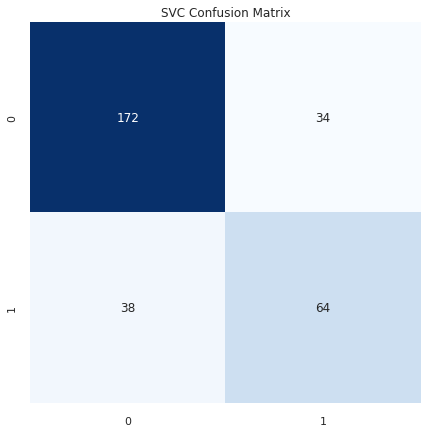

In [ ]:
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_SVC),annot=True,cmap="Blues",fmt="d",cbar=False)

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

*The precision of 0.76 indicates that 76% of classified diabetes are actually having diabetes. This is a relative ok precision but in real case, 
this type I error (24%) will waste medical resources and cases unecessary burdon to the patient.*

*The Recall of 0.77 indicates that 77% of patients with diabetes will be correctly detected but 23% will miss. This 23% is type II error. In this case, the 
23% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement.*

The Type II error will be more dangers in this business application. 

### Random Forest Classifier


In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:

rfc1.fit(X_train, y_train)

y_pred_rf=rfc1.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print('-----')
print(classification_report(y_test, y_pred_rf))

[[175  31]
 [ 35  67]]
-----
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.75      0.76       308
weighted avg       0.78      0.79      0.78       308



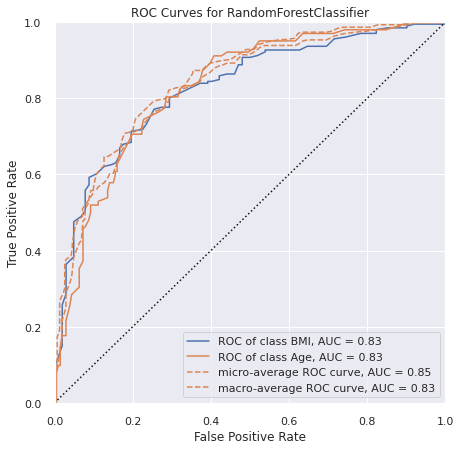

In [ ]:
classes = ["BMI", "Age"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(RandomForestClassifier(random_state=42), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

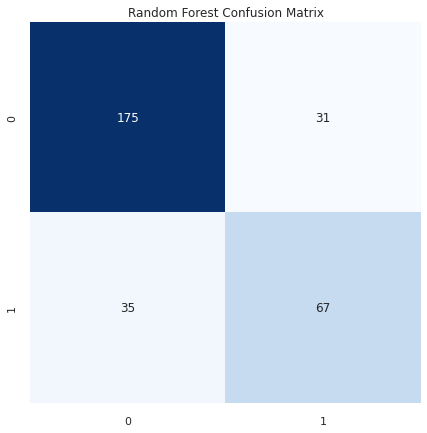

In [ ]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True,cmap="Blues",fmt="d",cbar=False)

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)


*The precision of 0.78 indicates that 78% of classified diabetes are actually having diabetes. This is a relative ok precision but in real case, 
this type I error (22%) will waste medical resources and cases unecessary burdon to the patient.*

*The Recall of 0.75 indicates that 79% of patients with diabetes will be correctly detected but 21% will miss. This 21% is type II error. In this case, the 
21% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement.*

The Type II error will be more dangers in this business application. 


## Model Comparison, Logistic Regression vs. SVM vs. Random Forest

Below table is the model performance of three models obtained with GridSearch with 5 folds. We can see that **Random Forest outperforms the other models on all four performance metrics (Precisision, Recall, F1-score, Support).**



|Indicators - Weighted Avg | LogisticRegression|  SVM|  Random Forest|
| ------------- |-------------|------------- |-------------|
|Precision| 0.75 |0.76| 0.78|
|Recalls |0.75| 0.77| 0.79|
|F1-Score |0.75 |0.77 |0.78|
|Support| 308| 308| 308|


In the case of identifying high-risk population, we think false negative error(Recall) is more important than false positive (Precision). Prevention cost is much lower than medical treatment cost, so we want to identify as much high-risk people as possible. We can see that Random Forest performs very well compared with Logistic Regression and SVM.